In [116]:
import pandas as pd

In [131]:
df = pd.read_csv('disney_movies.csv')

In [132]:
df

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


579 registros, mas existem alguns dados nulos

---

Alterando o nome das colunas para português

In [133]:
df.rename(columns={'movie_title':'titulo_do_filme', 'release_date':'data_de_lancamento', 'genre':'genero', 'mpaa_rating':'classificacao', 'total_gross': 'lucro', 'inflation_adjusted_gross':'lucro_ajustado_inflacao'}, inplace=True)

---

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   titulo_do_filme          579 non-null    object
 1   data_de_lancamento       579 non-null    object
 2   genero                   562 non-null    object
 3   classificacao            523 non-null    object
 4   lucro                    579 non-null    int64 
 5   lucro_ajustado_inflacao  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [135]:
df['data_de_lancamento'] = pd.to_datetime(df['data_de_lancamento'])

É possível observar valores nulos na feature genero e classificacao

In [136]:
df['genero'].unique()

array(['Musical', 'Adventure', 'Drama', 'Comedy', nan, 'Action', 'Horror',
       'Romantic Comedy', 'Thriller/Suspense', 'Western', 'Black Comedy',
       'Documentary', 'Concert/Performance'], dtype=object)

In [137]:
df['classificacao'].unique()

array(['G', nan, 'Not Rated', 'PG', 'R', 'PG-13'], dtype=object)

In [138]:
df[df['classificacao'] == 'Not Rated']

,titulo_do_filme,data_de_lancamento,genero,classificacao,lucro,lucro_ajustado_inflacao
11,Bon Voyage!,1962-05-17,Comedy,Not Rated,9230769,109581646
13,The Jungle Book,1967-10-18,Musical,Not Rated,141843000,789612346
404,America's Heart and Soul,2004-07-02,Documentary,Not Rated,314000,426246


In [139]:
df[df['classificacao'].isna()]

,titulo_do_filme,data_de_lancamento,genero,classificacao,lucro,lucro_ajustado_inflacao
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,NaN,28200000,528279994
7,Sleeping Beauty,1959-01-29,Drama,NaN,9464608,21505832
9,The Absent Minded Professor,1961-03-16,Comedy,NaN,25381407,310094574
12,The Sword in the Stone,1963-12-25,Adventure,NaN,22182353,153870834
14,Blackbeard's Ghost,1968-02-08,Comedy,NaN,21540050,138612686
16,The Boatniks,1970-07-01,Comedy,NaN,18607492,101200742
17,Bedknobs and Broomsticks,1971-10-07,Musical,NaN,17871174,91305448
18,The Apple Dumpling Gang,1975-07-01,Comedy,NaN,31916500,131246872
19,Freaky Friday,1977-01-21,Comedy,NaN,25942000,98067733
20,The Many Adventures of Winnie the Pooh,1977-03-11,NaN,NaN,0,0


Verificando se representa muito no lucro, para uma futura analise de qual faixa etária está lucrando mais e qual genero se classifica melhor por faixa etária

In [140]:
soma_total = df['lucro_ajustado_inflacao'].sum()

In [141]:
soma_nulos = df[df['classificacao'].isna() | df['genero'].isna()]['lucro_ajustado_inflacao'].sum()

In [142]:
print(soma_total)
print(soma_nulos)
print(soma_total-soma_nulos)
print("Porcentagem que representa: " , (soma_nulos / soma_total) * 100)

68763500997
3307750551
65455750446
Porcentagem que representa:  4.810328885296736


In [144]:
df['classificacao'].fillna('Not Rated')
df['genero'].fillna('Not Rated')

df

,titulo_do_filme,data_de_lancamento,genero,classificacao,lucro,lucro_ajustado_inflacao
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   titulo_do_filme          579 non-null    object        
 1   data_de_lancamento       579 non-null    datetime64[ns]
 2   genero                   579 non-null    object        
 3   classificacao            579 non-null    object        
 4   lucro                    579 non-null    int64         
 5   lucro_ajustado_inflacao  579 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 27.3+ KB


In [147]:
pd.set_option('display.float_format', '{:,.2f}'.format)
df['lucro_ajustado_inflacao'].describe()

count             579.00
mean      118,762,523.31
std       286,085,280.04
min                 0.00
25%        22,741,232.00
50%        55,159,783.00
75%       119,202,000.00
max     5,228,953,251.00
Name: lucro_ajustado_inflacao, dtype: float64

In [148]:
pd.reset_option('display.float_format')

Desvio padrao está extremamante alto, e analisando o mínimo e o máximo é possível observar uma discrepância entre eles. 

Desvio Padrão: 286 milhões
Mínimo de lucro: 0
Máximo de lucro: 5.2 bilhões

Com isso, existem filmes que puxam a média para cima.

Filme acima da média

In [149]:
media = df['lucro_ajustado_inflacao'].mean()
df[df['lucro_ajustado_inflacao'] > media]


,titulo_do_filme,data_de_lancamento,genero,classificacao,lucro,lucro_ajustado_inflacao
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
569,Captain America: Civil War,2016-05-06,Action,PG-13,408084349,408084349
571,Finding Dory,2016-06-17,Adventure,PG,486295561,486295561
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


filmes com um lucro maior que 500 milhões = 15

In [150]:
df[df['lucro_ajustado_inflacao'] > 500000000]

,titulo_do_filme,data_de_lancamento,genero,classificacao,lucro,lucro_ajustado_inflacao
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,Not Rated,28200000,528279994
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
13,The Jungle Book,1967-10-18,Musical,Not Rated,141843000,789612346
179,The Lion King,1994-06-15,Adventure,G,422780140,761640898


filmes com um lucro maior que 1 bilhão = 6

In [151]:
df[df['lucro_ajustado_inflacao'] > 1000000000]

,titulo_do_filme,data_de_lancamento,genero,classificacao,lucro,lucro_ajustado_inflacao
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985


filmes com um lucro maior que 5 bilhões = 1

In [152]:
df[df['lucro_ajustado_inflacao'] > 5000000000]

,titulo_do_filme,data_de_lancamento,genero,classificacao,lucro,lucro_ajustado_inflacao
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251


Mesmo sem ter um gênero de "Animação", é possível saber que esses maiores filmes são animações infantis clássicas. Então possivelmente a maior classificação será entre o público geral

In [153]:
print("G (Geral): ",(df['classificacao'] == 'G').sum())
print("PG (Orientação Parental): ", (df['classificacao'] == 'PG').sum())
print("PG-13 (Idade Mínima 13 Anos): ", (df['classificacao'] == 'PG-13').sum())
print("R (Restrito): ", (df['classificacao'] == 'R').sum())

G (Geral):  86
PG (Orientação Parental):  187
PG-13 (Idade Mínima 13 Anos):  145
R (Restrito):  102


Os maiores filmes são do público que recebeu menos variedade de filmes.

---

Começando a plotar

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Quantidade de filmes por ano

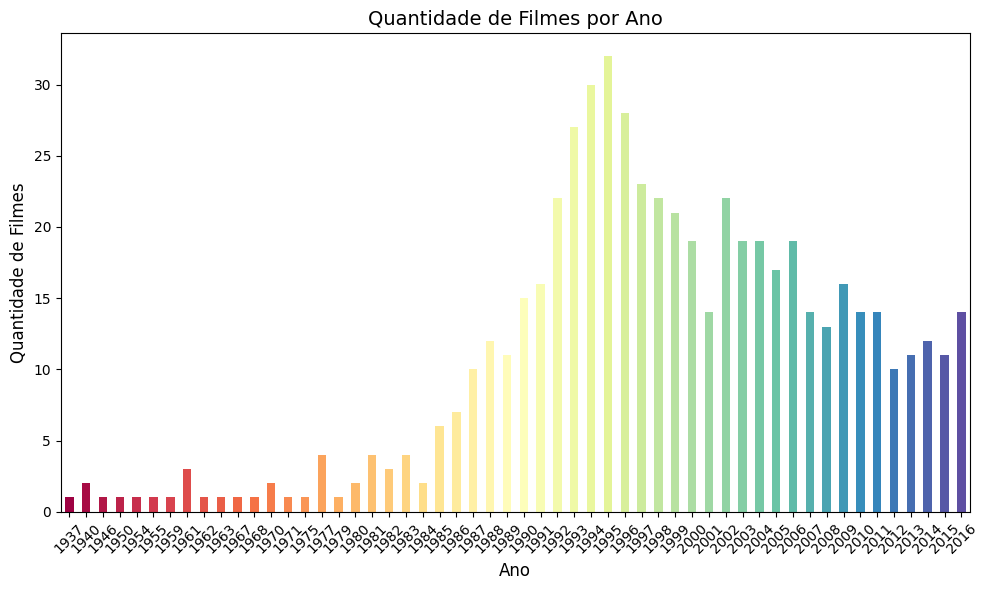

In [167]:
df['ano'] = df['data_de_lancamento'].dt.year
contagem_por_ano = df['ano'].value_counts().sort_index()

n = len(contagem_por_ano)
cores = plt.cm.Spectral(np.linspace(0, 1, n))

plt.figure(figsize=(10, 6))
contagem_por_ano.plot(kind='bar', color=cores)

plt.title('Quantidade de Filmes por Ano', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade de Filmes', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 10 anos com maior quantidade de filme

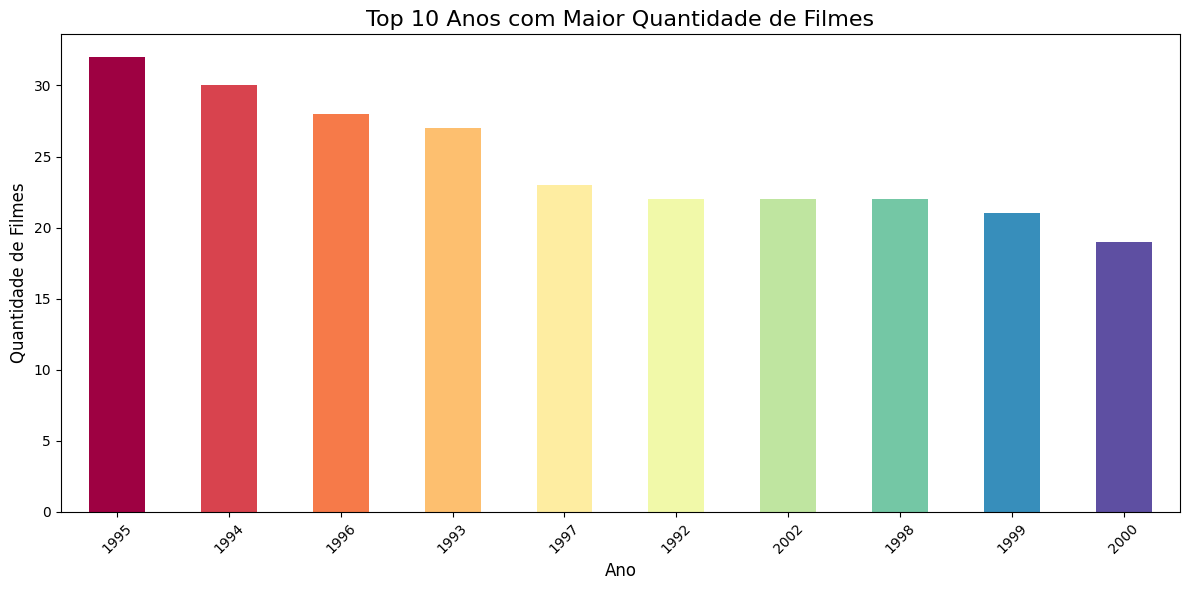

In [173]:
top10_anos = contagem_por_ano.sort_values(ascending=False).head(10)
top10_anos = top10_anos.sort_values(ascending=False)

cores = plt.cm.Spectral(np.linspace(0, 1, len(top10_anos)))

plt.figure(figsize=(12, 6))
top10_anos.plot(kind='bar', color=cores)

plt.title('Top 10 Anos com Maior Quantidade de Filmes', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade de Filmes', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A década de 90 foi muito boa para a disney em questão de lucros